# A common interface for handling gridded data

We've already seen that astropy has a Table class that provides a uniform way of reading, manipulating, and writing table data. Similarly, the [astropy.nddata](http://docs.astropy.org/en/stable/nddata/index.html) sub-package provides an [NDData](http://docs.astropy.org/en/stable/api/astropy.nddata.NDData.html#astropy.nddata.NDData) class that provide a common interface to datasets that consist of an n-dimensional array optionally with WCS information. In addition, this sub-package provides a set of utilities that can operate on NDData objects as well as Numpy arrays.



<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Create an NDData object</li>
<li>Create/read in a CCDData object</li>
<li>Extract cutouts from image data with WCS information</li>
<li>Resize n-dimensional data</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy.nddata. For more information about the features presented below as well as other available features, you can read the
[astropy.nddata documentation](https://docs.astropy.org/en/stable/nddata/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Creating an NDData object

The main class in the [astropy.nddata](http://docs.astropy.org/en/stable/nddata/index.html) sub-package is [NDData](http://docs.astropy.org/en/stable/api/astropy.nddata.NDData.html#astropy.nddata.NDData):

In [2]:
from astropy.nddata import NDData

The simplest way to initialize NDData is with a data array:

In [4]:
import numpy as np
data = np.random.random((16, 16, 16))

In [5]:
ndd1 = NDData(data)

In [6]:
ndd1

NDData([[[0.81672278, 0.46492137, 0.97785042, ..., 0.00495912,
          0.47601045, 0.53435835],
         [0.95109301, 0.79362226, 0.79136019, ..., 0.96537628,
          0.55477077, 0.66316409],
         [0.17083858, 0.78954322, 0.56124107, ..., 0.78876576,
          0.12652953, 0.72351561],
         ...,
         [0.70016343, 0.33875277, 0.14425537, ..., 0.23742366,
          0.66985277, 0.5723385 ],
         [0.58267204, 0.06539944, 0.39145365, ..., 0.09405157,
          0.99019637, 0.45767191],
         [0.80964163, 0.96251164, 0.07778434, ..., 0.06341908,
          0.1677675 , 0.70810668]],

        [[0.00241816, 0.05292537, 0.61092998, ..., 0.88750729,
          0.07023746, 0.72233568],
         [0.70929439, 0.54067658, 0.41423355, ..., 0.59365453,
          0.15936716, 0.58875072],
         [0.55099236, 0.71711317, 0.57588081, ..., 0.26017556,
          0.5820803 , 0.10091245],
         ...,
         [0.51618564, 0.23706042, 0.94617663, ..., 0.99329601,
          0.62610147, 0.6

The real value from NDData comes from the ability to add other meta-data, such as the unit, a mask, or WCS information:

In [7]:
from astropy import units as u
from astropy.wcs import WCS
wcs = WCS(naxis=3)
mask = data > 0.5

In [8]:
ndd2 = NDData(data, mask=mask, unit = u.Jy, wcs=wcs)

In [10]:
ndd2.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : ''  ''  ''  
CRVAL : 0.0  0.0  0.0  
CRPIX : 0.0  0.0  0.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 1.0  1.0  1.0  
NAXIS : 0  0

It is also possible to attach uncertainties:

In [11]:
from astropy.nddata import StdDevUncertainty
uncertainty = StdDevUncertainty(data / 10)
ndd3 = NDData(data, uncertainty = uncertainty)

In [12]:
ndd3.uncertainty

StdDevUncertainty([[[0.08167228, 0.04649214, 0.09778504, ..., 0.00049591,
                     0.04760105, 0.05343583],
                    [0.0951093 , 0.07936223, 0.07913602, ..., 0.09653763,
                     0.05547708, 0.06631641],
                    [0.01708386, 0.07895432, 0.05612411, ..., 0.07887658,
                     0.01265295, 0.07235156],
                    ...,
                    [0.07001634, 0.03387528, 0.01442554, ..., 0.02374237,
                     0.06698528, 0.05723385],
                    [0.0582672 , 0.00653994, 0.03914536, ..., 0.00940516,
                     0.09901964, 0.04576719],
                    [0.08096416, 0.09625116, 0.00777843, ..., 0.00634191,
                     0.01677675, 0.07081067]],

                   [[0.00024182, 0.00529254, 0.061093  , ..., 0.08875073,
                     0.00702375, 0.07223357],
                    [0.07092944, 0.05406766, 0.04142336, ..., 0.05936545,
                     0.01593672, 0.05887507],
             

## Using the CCDData class

For now, NDData is just a data container, so it does not have useful methods on it. A more useful class is [CCDData](http://docs.astropy.org/en/stable/api/astropy.nddata.CCDData.html#astropy.nddata.CCDData) which is a sub-class of NDData and is a good example to demonstrate NDData functionality:

In [13]:
from astropy.nddata import CCDData

The CCDData class recognizes FITS files:

In [14]:
ccd = CCDData.read('data/gc_2mass_k.fits', unit = 'count')
ccd

CCDData([[563.1581 , 540.4065 , 524.3385 , ..., 498.93182, 501.9532 ,
          640.75134],
         [514.72516, 586.9167 , 514.5878 , ..., 505.34076, 504.9287 ,
          506.39362],
         [510.01007, 510.19318, 521.3172 , ..., 532.62427, 515.7323 ,
          526.5816 ],
         ...,
         [530.24384, 532.5785 , 536.1492 , ..., 557.43585, 510.60516,
          517.9296 ],
         [521.363  , 524.3385 , 518.0212 , ..., 540.0403 , 546.3118 ,
          544.25183],
         [519.6692 , 525.71185, 522.8278 , ..., 544.7096 , 522.2785 ,
          543.06165]])

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

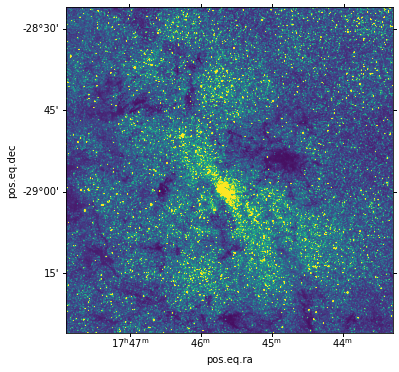

In [15]:
plt.subplot(projection=ccd.wcs)
plt.imshow(ccd.data, vmax=800)
plt.grid

A useful aspect of NDData classes like CCDData is that they can be sliced like Numpy arrays and this automatically slices the mask, uncertainty, and WCS (if present):

In [16]:
subccd = ccd[100:300, 200:400]

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

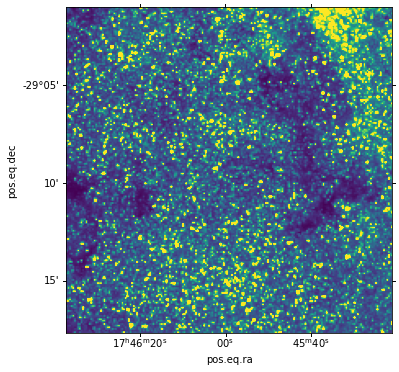

In [17]:
plt.subplot(projection=subccd.wcs)
plt.imshow(subccd.data, vmax=800)
plt.grid

Another useful feature is the ability to do arithmetic between CCDData objects and have uncertainties propagate automatically:

In [18]:
ccd1 = CCDData([1, 2, 3], unit='count',
               uncertainty=StdDevUncertainty([1, 1.2, 1.5]))
ccd2 = CCDData([0.5, 0.5, 0.5], unit='count',
               uncertainty=StdDevUncertainty([0.2, 0.1, 0.3]))

In [19]:
ccd_sub = ccd1.subtract(ccd2)

In [20]:
ccd_sub.data

array([0.5, 1.5, 2.5])

In [21]:
ccd_sub.uncertainty

StdDevUncertainty([1.0198039 , 1.20415946, 1.52970585])

Note however that at the moment this framework does not understand correlated errors!

In [22]:
ccd1.divide(ccd1).uncertainty

StdDevUncertainty([1.41421356, 0.84852814, 0.70710678])

## Extracting cutouts from images

As seen above, we can easily extract cutouts of NDData objects by using slicing - however, the astropy.nddata sub-package also provides a [Cutout2D](http://docs.astropy.org/en/stable/api/astropy.nddata.Cutout2D.html#astropy.nddata.Cutout2D) class that can be used to generate cutouts from data, either as NDData objects or as plain arrays and WCS objects:

In [23]:
from astropy.nddata import Cutout2D

One of the main benefits of this class is that allows cutouts to be extracted by specifying celestial coordinates rather than just pixel coordinates:

In [24]:
from astropy.coordinates import SkyCoord
galcen = SkyCoord(0 * u.deg, 0 * u.deg, frame='galactic')

In [25]:
cutout = Cutout2D(ccd.data, galcen, 20 * u.arcmin, wcs = ccd.wcs)

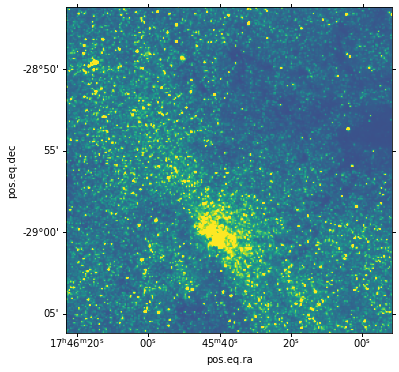

In [26]:
plt.subplot(projection=cutout.wcs)
plt.imshow(cutout.data, vmin=300, vmax=1000)

The Cutout2D object also retains information about where it was extracted from in the image:

<WCSAxesSubplot:>

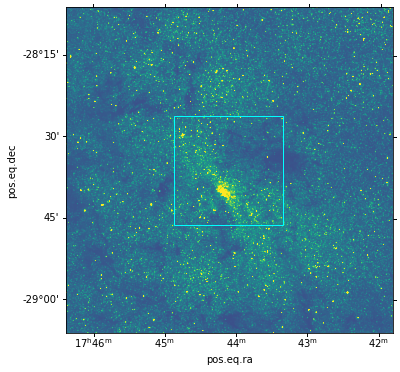

In [28]:
plt.subplot(projection=cutout.wcs)
plt.imshow(ccd.data, vmin=300, vmax=1000)
cutout.plot_on_original(color='cyan')

and we can therefore also convert positions in the cutout back to positions in the original image:

In [29]:
cutout.to_original_position((20, 30))

(257, 268)

## Resizing images

Another set of useful functions in astropy.nddata are [block_reduce](http://docs.astropy.org/en/stable/api/astropy.nddata.block_reduce.html#astropy.nddata.block_reduce) and [block_replicate](http://docs.astropy.org/en/stable/api/astropy.nddata.block_replicate.html#astropy.nddata.block_replicate) which can be used to downsample and upsample data by integer factors:

In [31]:
from astropy.nddata import block_reduce, block_replicate

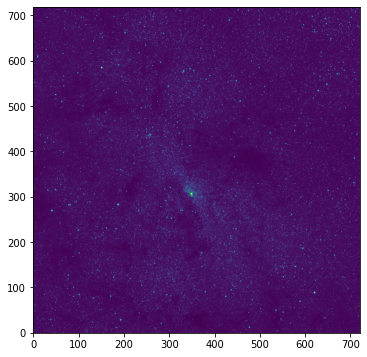

In [33]:
plt.imshow(ccd.data)

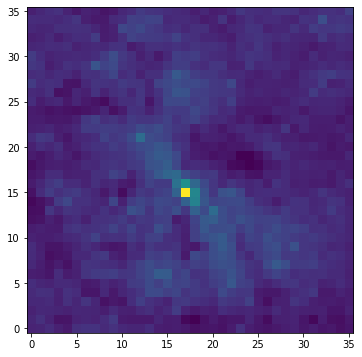

In [32]:
plt.imshow(block_reduce(ccd.data, 20))

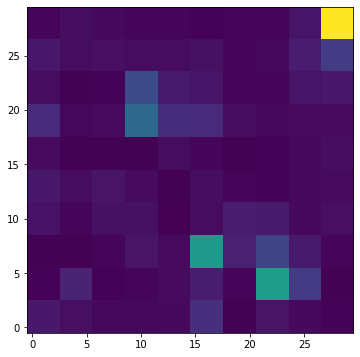

In [36]:
plt.imshow(block_replicate(ccd.data[:10, :10], 3))

For now, this does not properly support NDData objects or scaling the WCS information (see [astropy/astropy#4796](https://github.com/astropy/astropy/issues/4796) for an example of as astropy feature request!).

<center><i>This notebook was originally written by <a href="https://aperiosoftware.com/">Aperio Software Ltd</a> and modified by Brigitta Sipőcz. &copy; 2019-2021 and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)